In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load and preprocess training data
df_train = pd.read_csv('fraudTrain.csv')

drop_columns = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'gender', 
                'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 
                'trans_num', 'unix_time', 'merch_lat', 'merch_long']
df_train.drop(columns=drop_columns, inplace=True)

df_train['category'] = pd.factorize(df_train['category'])[0]
df_train['merchant'] = pd.factorize(df_train['merchant'])[0]
df_train['amt_log'] = np.log1p(df_train['amt'])

X_train = df_train.drop('is_fraud', axis=1)
y_train = df_train['is_fraud']

# Load and preprocess test data
df_test = pd.read_csv('fraudTest.csv')
df_test.drop(columns=drop_columns, inplace=True)

df_test['category'] = pd.factorize(df_test['category'])[0]
df_test['merchant'] = pd.factorize(df_test['merchant'])[0]
df_test['amt_log'] = np.log1p(df_test['amt'])

X_test = df_test.drop('is_fraud', axis=1)
y_test = df_test['is_fraud']

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle Imbalanced Data with SMOTE
smote = SMOTE(sampling_strategy=0.6, random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Data preprocessing completed successfully!")


Data preprocessing completed successfully!


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Improved MLP Model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_sm.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

mlp_model.fit(X_train_sm, y_train_sm, epochs=15, batch_size=512, validation_data=(X_test, y_test))

print("MLP model training completed!")


Epoch 1/15


C:\Users\givea\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4029/4029 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9305 - loss: 0.1732 - val_accuracy: 0.9431 - val_loss: 0.1796
Epoch 2/15
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9559 - loss: 0.1033 - val_accuracy: 0.9319 - val_loss: 0.1969
Epoch 3/15
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9595 - loss: 0.0948 - val_accuracy: 0.9366 - val_loss: 0.1971
Epoch 4/15
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9600 - loss: 0.0926 - val_accuracy: 0.9347 - val_loss: 0.2090
Epoch 5/15
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9611 - loss: 0.0902 - val_accuracy: 0.9287 - val_loss: 0.2246
Epoch 6/15
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9614 - loss: 0.0891 - val_accuracy: 0.9327 - val_loss: 0.2285
Epoch 7/15
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9622 - loss: 0.0880 - val_accuracy: 0.9297 - val_loss: 0.2333
Epoch 8/15
4029/4029 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9619 - loss: 0.0876 - val

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Improved Autoencoder Model
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder on normal (non-fraud) transactions
X_train_normal = X_train[y_train == 0]
autoencoder.fit(X_train_normal, X_train_normal, epochs=15, batch_size=512, validation_split=0.1)

print("Autoencoder training completed!")


Epoch 1/15
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6310 - val_loss: 0.6535
Epoch 2/15
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5923 - val_loss: 0.6531
Epoch 3/15
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5862 - val_loss: 0.6528
Epoch 4/15
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6067 - val_loss: 0.6528
Epoch 5/15
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5953 - val_loss: 0.6528
Epoch 6/15
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6325 - val_loss: 0.6527
Epoch 7/15
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6163 - val_loss: 0.6528
Epoch 8/15
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5990 - val_loss: 0.6528
Epoch 9/15
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5804 - val_loss: 0.6529
Epoch 10/15
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6030 - val_loss: 0.6528
Epoch 11/15
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5813 - val_loss: 0.6527
Epoch 12/15
2267/2267 ━━━━━━━━

In [21]:
# Detect anomalies
X_test_recon = autoencoder.predict(X_test)
anomaly_scores = np.mean(np.abs(X_test - X_test_recon), axis=1)
thresh_autoencoder = np.percentile(anomaly_scores, 95)
y_pred_autoenc = (anomaly_scores > thresh_autoencoder).astype(int)

print("Anomaly detection using Autoencoder completed!")


17367/17367 ━━━━━━━━━━━━━━━━━━━━ 13s 747us/step
Anomaly detection using Autoencoder completed!


In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
# MLP Predictions
y_pred_probs = mlp_model.predict(X_test)
y_pred_mlp = (y_pred_probs > 0.4).astype(int)

# Performance Metrics for MLP Model
print('MLP Model Accuracy:', accuracy_score(y_test, y_pred_mlp))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_probs))
print('Classification Report:\n', classification_report(y_test, y_pred_mlp))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_mlp))


17367/17367 ━━━━━━━━━━━━━━━━━━━━ 15s 878us/step
MLP Model Accuracy: 0.9261911145740923
ROC AUC Score: 0.8084179159316357
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96    553574
           1       0.02      0.43      0.04      2145

    accuracy                           0.93    555719
   macro avg       0.51      0.68      0.50    555719
weighted avg       0.99      0.93      0.96    555719

Confusion Matrix:
 [[513783  39791]
 [  1226    919]]


In [8]:
# Detect anomalies
X_test_recon = autoencoder.predict(X_test)
anomaly_scores = np.mean(np.abs(X_test - X_test_recon), axis=1)
thresh_autoencoder = np.percentile(anomaly_scores, 95)
y_pred_autoenc = (anomaly_scores > thresh_autoencoder).astype(int)

print("Anomaly detection using Autoencoder completed!")

17367/17367 ━━━━━━━━━━━━━━━━━━━━ 13s 742us/step
Anomaly detection using Autoencoder completed!


In [10]:
# Hybrid model combining MLP and Autoencoder
y_pred_mlp = y_pred_mlp.reshape(-1, 1)  # Ensure (n_samples, 1)
y_pred_autoenc = y_pred_autoenc.reshape(-1, 1)
y_pred_hybrid = np.logical_or(y_pred_mlp, y_pred_autoenc).astype(int).flatten()  # Convert back to (n_samples,)

# Performance Metrics
print('Hybrid Model Accuracy:', accuracy_score(y_test, y_pred_hybrid))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_probs))
print('Classification Report:\n', classification_report(y_test, y_pred_hybrid))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_hybrid))


Hybrid Model Accuracy: 0.889571887950565
ROC AUC Score: 0.8095175690835892
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94    553574
           1       0.02      0.51      0.03      2145

    accuracy                           0.89    555719
   macro avg       0.51      0.70      0.49    555719
weighted avg       0.99      0.89      0.94    555719

Confusion Matrix:
 [[493257  60317]
 [  1050   1095]]


ExactExplainer explainer: 555720it [2:54:33, 53.06it/s]                                                                


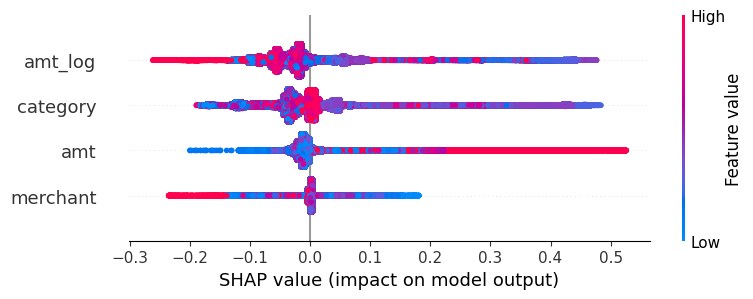

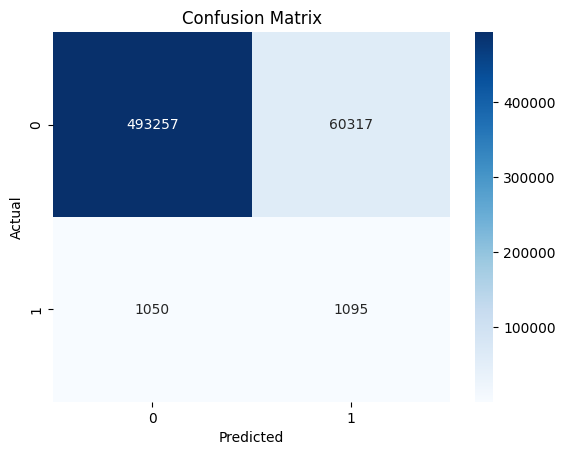

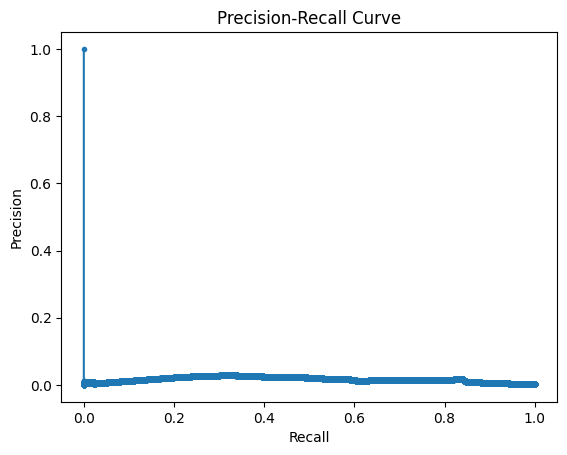

False Positives: 60317, False Negatives: 1050


In [11]:
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# SHAP Feature Importance
explainer = shap.Explainer(mlp_model, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, features=X_test, feature_names=df_train.drop('is_fraud', axis=1).columns)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_hybrid)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# False Positives and False Negatives Count
false_positives = conf_matrix[0][1]
false_negatives = conf_matrix[1][0]
print(f"False Positives: {false_positives}, False Negatives: {false_negatives}")